In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
from skimage import data
from skimage import io
from skimage import color

from matplotlib import pyplot as plt
import cv2
import numpy as np
from numpy import linalg as la

In [32]:
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [33]:
image_1 = cv2.imread('Q4_image_1.jpg')[...,::-1]    # Image 1 from Q4
image_2 = cv2.imread('Q4_image_2.jpg')[...,::-1]    # Image 2 from Q4
image_gray=cv2.cvtColor(image_1,cv2.COLOR_RGB2GRAY)

#image_1 = image_1 / 255
#image_2 = image_2 / 255
#image_gray = image_gray / 255

Text(0.5, 1.0, 'Image 2')

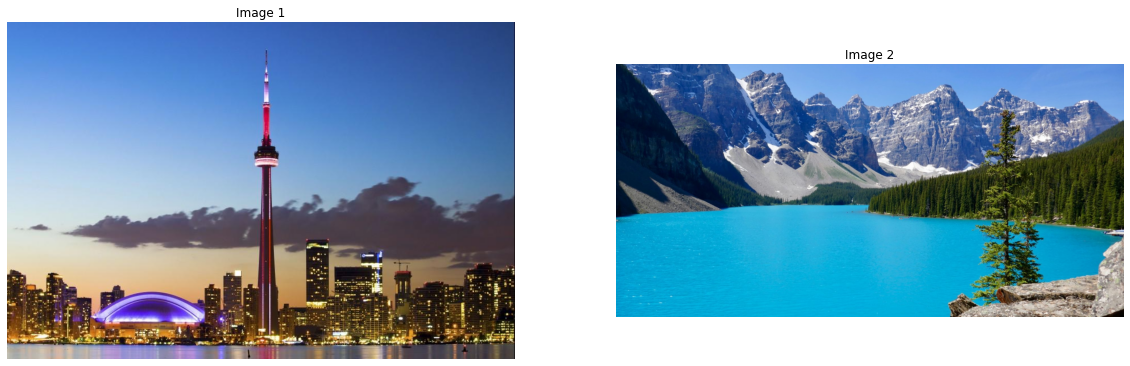

In [34]:
plt.figure(figsize=(20,35))

plt.subplot(1,2,1)
plt.imshow(image_1)
plt.axis('off')
plt.title('Image 1')

plt.subplot(1,2,2)
plt.imshow(image_2)
plt.axis('off')
plt.title('Image 2')

# Gaussian/ Sobel filter implementation details

## Combining 1-D gaussian kernels

1-D kernels:

$g(x)=\frac{1}{\sqrt{2 \pi \sigma_{x}^{2}}} e^{-\frac{x^{2}}{\sigma_{x}^{2}}}$ 

$g(y)=\frac{1}{\sqrt{2 \pi \sigma_{y}^{2}}} e^{-\frac{y^{2}}{\sigma_{y}^{2}}}$

If $\sigma_{x}=\sigma_{y}=\sigma$, we can formalize the 2-D gaussian kernel, as a multiplication of 1-D kernels, with the standard deviation $\sigma$, as follows:

$g(xy)=\frac{1}{2 \pi \sigma_{x} \sigma_{y}} e^{-\frac{x^{2}+y^{2}}{\sigma_{x} \sigma_{y}}}$

Otherwise, The combination of these 1-D gaussian kernels will not be gaussian itself.

## Defining a filter using a function:

In [35]:
def value(x,y,h,w):
    '''
    Calculates a sample function value, given a location on the image domain.

    x,y: location indicators
    h,w: height and width 
    '''
    h_mid = (h-1)/2
    w_mid = (w-1)/2
    return np.abs(x-h_mid)+np.abs(y-w_mid)
def invert(g):
    return -g+np.max(g)
def create_kernel(h,w,p):
    '''

    Creates a kernel, given its corresponding dimensions and distribution.

    h,w: height and width
    p: distribution
    '''
    g = np.zeros(shape=(h,w))
    for x in range(h):
        for y in range(w):
            g[x,y] = p(x,y,h,w)
    g_f = g/np.sum(g)
    return invert(g_f)

**Assignment1 wants you to implement a function to calculate a gaussian distribution.**

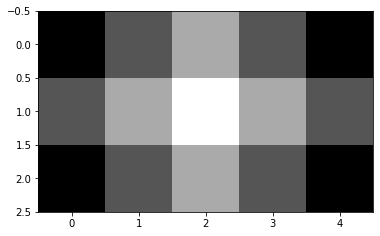

In [36]:
h = create_kernel(3,5,value)
plt.imshow(h, cmap='gray')

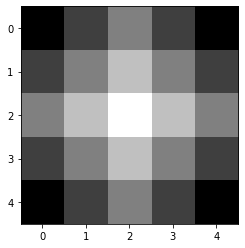

In [37]:
h = create_kernel(5,5,value)
plt.imshow(h, cmap='gray')

Text(0.5, 1.0, 'Filtered image')

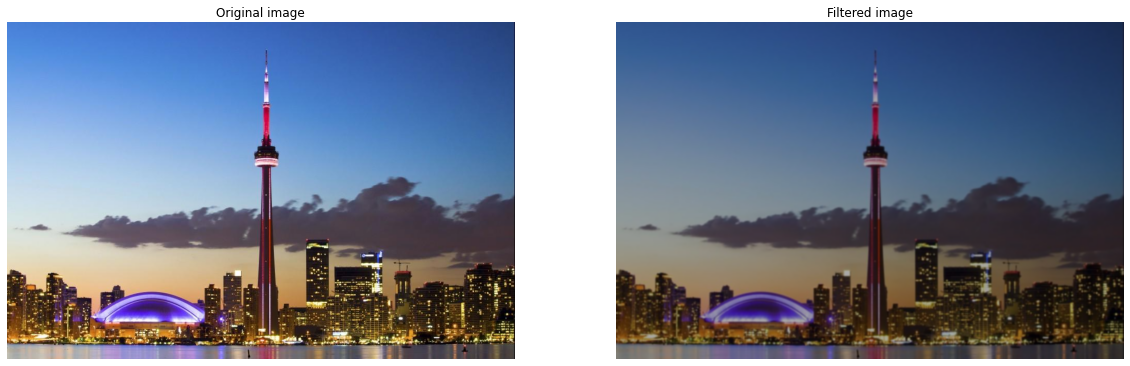

In [38]:
img_filtered = cv2.filter2D(image_1, -1, h)
plt.figure(figsize=(20,35))

plt.subplot(1,2,1)
plt.imshow(image_1, cmap='gray')
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
plt.title('Filtered image')

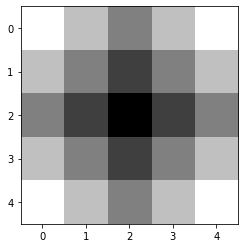

In [39]:
inv_h = invert(h)
plt.imshow(inv_h, cmap='gray')

Text(0.5, 1.0, 'Filtered image')

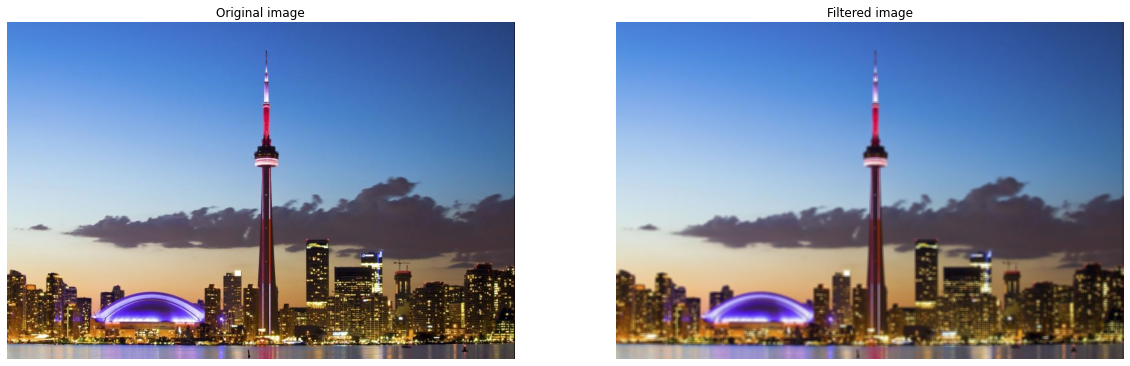

In [40]:
img_filtered2 = cv2.filter2D(image_1, -1, inv_h)
plt.figure(figsize=(20,35))

plt.subplot(1,2,1)
plt.imshow(image_1, cmap='gray')
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(img_filtered2, cmap='gray')
plt.axis('off')
plt.title('Filtered image')

**Note: you should implement convolution function by your own!**

In [41]:
k=2

In [42]:
gaussian_kernel=np.array([[1,k,1],
                 [k,k*k,k],
                 [1,k,1]])
gaussian_kernel=gaussian_kernel/np.sum(gaussian_kernel)

In [43]:
gaussian_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

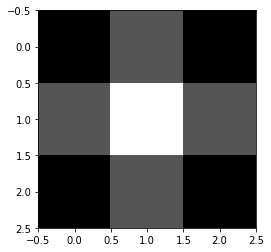

In [44]:
plt.imshow(gaussian_kernel, cmap='gray')

Text(0.5, 1.0, 'Filtered image')

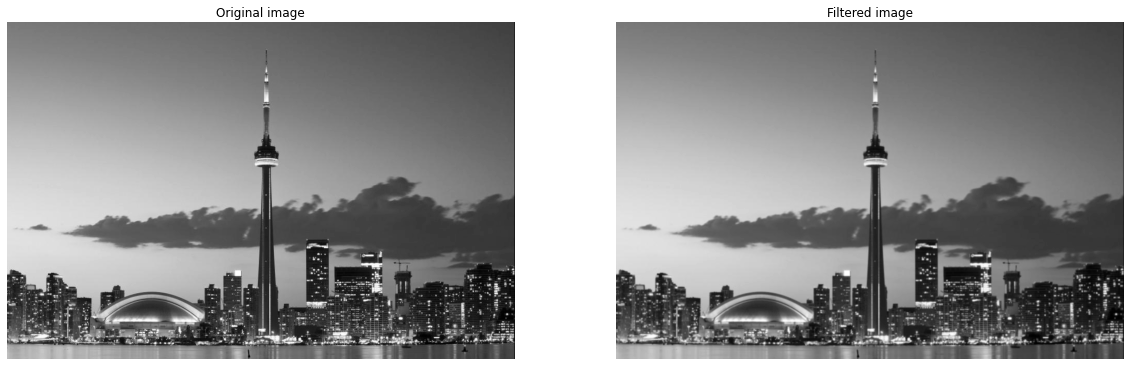

In [45]:
img_filtered = cv2.filter2D(image_gray, -1, gaussian_kernel)
plt.figure(figsize=(20,35))

plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap='gray')
plt.axis('off')
plt.title('Filtered image')

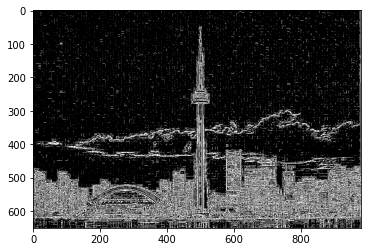

In [46]:
plt.imshow(image_gray-img_filtered, cmap='gray')

Text(0.5, 1.0, 'All edges')

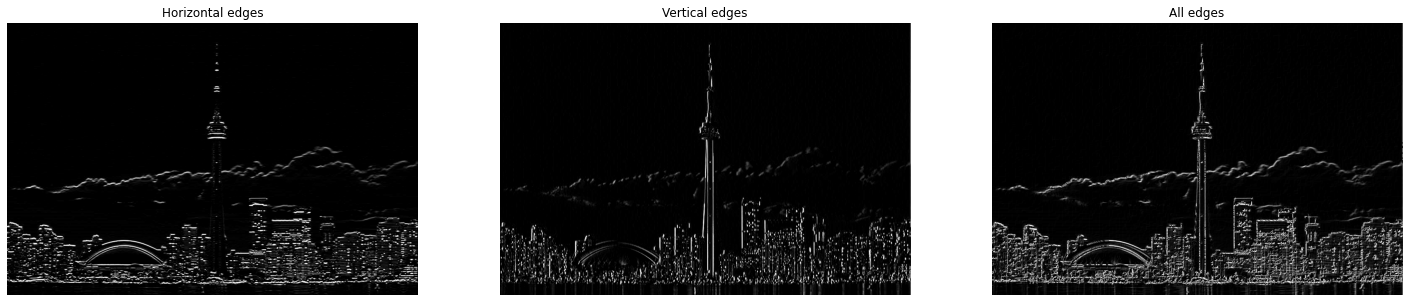

In [47]:
diff_kernel_x=np.array([[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]])
diff_kernel_y=np.array([[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]])

img_x = cv2.filter2D(image_gray, -1, diff_kernel_x)
img_y = cv2.filter2D(image_gray, -1, diff_kernel_y)
plt.figure(figsize=(25,45))

plt.subplot(1,3,1)
plt.imshow(img_x, cmap='gray')
plt.axis('off')
plt.title('Horizontal edges')

plt.subplot(1,3,2)
plt.imshow(img_y, cmap='gray')
plt.axis('off')
plt.title('Vertical edges')

plt.subplot(1,3,3)
plt.imshow(np.abs(img_x)+np.abs(img_y), cmap='gray')
plt.axis('off')
plt.title('All edges')

In [48]:
img_x = img_x / 255.
img_y = img_y / 255.

Text(0.5, 1.0, 'Real Magnitude')

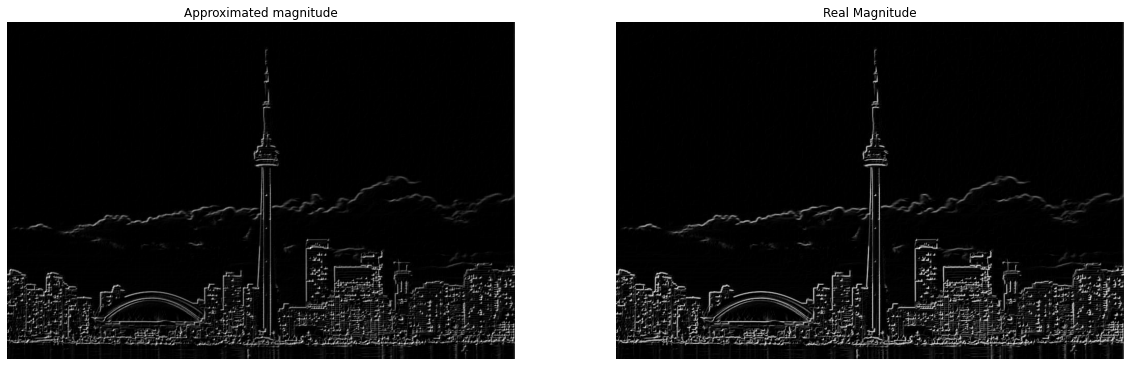

In [50]:
plt.figure(figsize=(20,35))

plt.subplot(1,2,1)
plt.imshow(np.abs(img_x)+np.abs(img_y), cmap='gray')
plt.axis('off')
plt.title('Approximated magnitude')

plt.subplot(1,2,2)
plt.imshow(sqrt(img_x*img_x+img_y*img_y), cmap='gray')
plt.axis('off')
plt.title('Real Magnitude')

## Image padding (useful for convolution)

**Note:** Pay attention to the "dtype" of your image (uint8/float32/...)

In [51]:
def pad_image(h,w, input_image):
    '''
    h,w: height and width
    '''
    dims = input_image.shape
    H, W = dims[0], dims[1]
    input_dtype = input_image.dtype
    if len(dims)==3:
        padded_image = np.zeros(shape=(2*h+H,2*w+W,3), dtype=input_dtype)
        padded_image[h:h+H,w:w+W,:]=input_image
    else:
        padded_image = np.zeros(shape=(2*h+H,2*w+W), dtype=input_dtype)
        padded_image[h:h+H,w:w+W]=input_image
    return padded_image

Text(0.5, 1.0, 'Padded image')

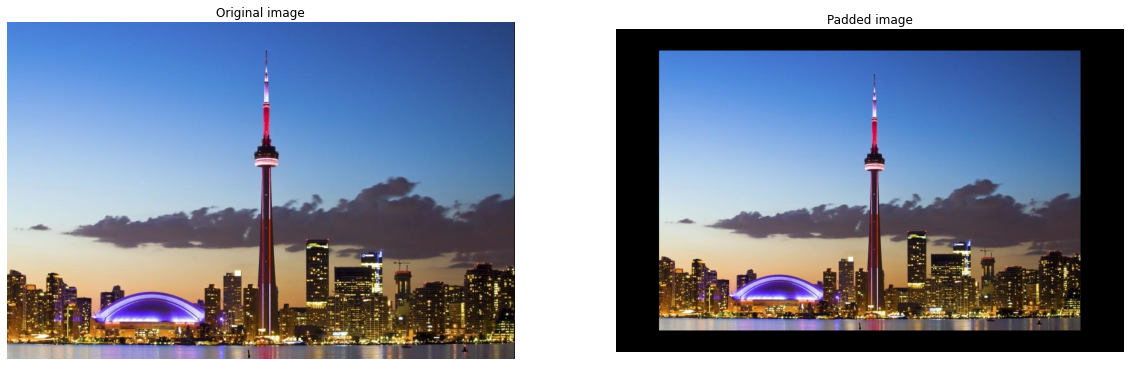

In [52]:
plt.figure(figsize=(20,35))

plt.subplot(1,2,1)
plt.imshow(image_1)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(pad_image(50,100,image_1))
plt.axis('off')
plt.title('Padded image')

**Notes:**

* You can approximate the gradient magnitude using $\sqrt{g_x^2+g_y^2} \approx |g_x|+|g_y|$

* The internal gaussian blur in a sobel filter might not suffice in some scenarios. For example, if we are not interested in getting cloud edges from the image above

* Subtracting a blurred copy of the image from the main one is a way to detect edges.

**TODO for Q4:**

* build your own convolutional function.

* Build your own gaussian/sobel filter builder function, as instructed.


# [Filters](http://scikit-image.org/docs/0.10.x/api/skimage.filter.html)

In [53]:
from skimage import filters
from skimage import feature

## Gaussian

We can specify different sigma for x and y:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


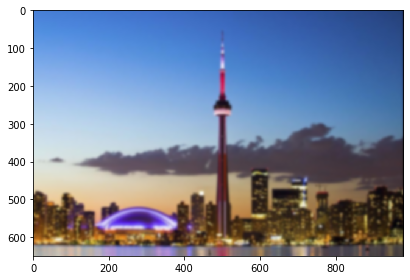

In [54]:
filtered = filters.gaussian(image_1, sigma=[3,3] )
io.imshow(filtered)

# Connected Component

In [55]:
image_3 = cv2.cvtColor(cv2.imread('Q6.png')[...,::-1], cv2.COLOR_RGB2GRAY)

In [56]:
image_3.shape

(205, 269)

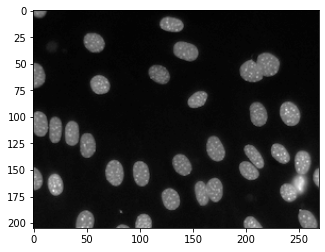

In [57]:
plt.imshow(image_3, cmap='gray')

In [66]:
t = np.mean(image_3)
t

12.465989663614108

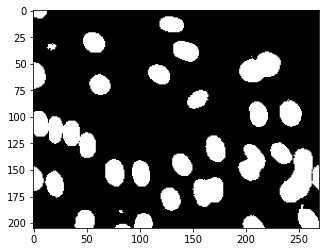

In [59]:
plt.imshow(image_3>t, cmap='gray')

Other thresholding options:
* Q4-Step IV
* Otsu's method

## Otsu's method

In [86]:
def otsu(I, nbins=256, tau=1.5):
    '''
    Finds the optimum adaptive threshold value for a 2-D image.
    inputs:
        I: a 2-D image (visualization map/ heat-map/ etc.)
        nbins: resolution of histogram. Increasing this parameter yields to more
        precise threshold value, achieved in longer time.
        tau: bottleneck amplititude
        returns: Otsu adaptive threshold value
    '''
    if np.max(I)<=1:
        I = np.round(I*nbins)
    #histogram of the image
    hist, bins = np.histogram(I.ravel(),nbins,[0,nbins])
    #CDF/ mean/ variance terms for multiple values
    i = np.arange(nbins)
    varsb = np.zeros(nbins)
    for j in range(1, nbins):
        w0 = np.sum(hist[0:j])
        w1 = np.sum(hist[j:nbins])
        u0 = np.sum(np.multiply(hist[0:j], i[0:j])) / (w0+10e-7)
        u1 = np.sum(np.multiply(hist[j:nbins], i[j:nbins])) / (w1+10e-7)
        varsb[j] = w0 * w1 * (u0-u1) * (u0-u1)
    # the threshold value is the one maximizing the variance term.
    t = np.argmax(varsb)
    #print(t)
    k = round(t*tau)
    if np.sum(hist[int(k):256]) < .1 * np.sum(hist):
        #print('happened')
        return t*tau
    else:
        return t/nbins

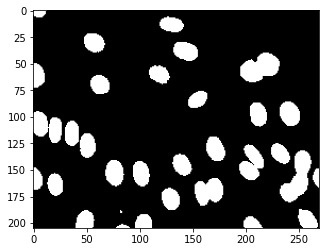

In [87]:
t=otsu(image_3)
plt.imshow(image_3>t*255, cmap='gray')

In [65]:
t*255

0.99609375